## Import

In [1]:
import random
import pandas as pd
import numpy as np
import os
import librosa

from tqdm.auto import tqdm

from sklearn.preprocessing import OneHotEncoder

import warnings
warnings.filterwarnings(action='ignore') 

## Hyperparameter Setting

In [2]:
CFG = {
    'SR':16000,
    'N_melspectrogram':16, # Melspectrogram 벡터를 추출할 개수
    'SEED':41
}

## Fixed Random-Seed

In [3]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

seed_everything(CFG['SEED']) # Seed 고정

## Data Pre-Processing 1
feature1. 로그 스케일링된 melspectrogram <br>
feature2. (운율적 소리(harmonic)+두드리는 소리(percussive)의 구성 요소) 평균<br>
feature3. 로그 스케일링된 melspectrogram의 델타<br>
위의 세 feature로 특성 추출

In [4]:
base_path = './data/'
train_df = pd.read_csv( base_path + '/train_data.csv')
test_df = pd.read_csv( base_path + '/test_data.csv')

In [5]:
# train feature engineering
# Data Folder path
root_folder = './data/'

    
features = []
log_specgrams_hp = []
f_list1=[]
f_list2=[]
f_list3=[]

for uid in tqdm(train_df['id']):
    
    root_path = os.path.join(root_folder, 'train')
    path = os.path.join(root_path, str(uid).zfill(5)+'.wav')
    
    # librosa패키지를 사용하여 wav 파일 load
    y, sr = librosa.load(path, sr=CFG['SR'])
     
    # feature1, feature3
    # librosa패키지를 사용하여 melspectrogram 추출
    melspectrogram = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=CFG['N_melspectrogram'])
    
    # feature3 : 로그스케일링된 melspectrogram의 델타값을 Feature로 사용
    y_feature3 = []
    for e in melspectrogram:
        y_feature3.append(np.mean(librosa.feature.delta(e)))
    f_list3.append(y_feature3)

    # log sccale로 변환
    feature1 = librosa.power_to_db(S=melspectrogram, ref=1.0)
    
    # feature1 : 추출된 melspectrogram들의 평균을 Feature로 사용
    y_feature1 = []
    for e in feature1:
        y_feature1.append(np.mean(e))    
    f_list1.append(y_feature1)
    
    
    # feature2
    # librosa.effects.hpss를 사용한 feature 추출
    y_harmonic, y_percussive = librosa.effects.hpss(y)
    melspec_harmonic = librosa.feature.melspectrogram(y_harmonic, n_mels = CFG['N_melspectrogram'])
    melspec_percussive = librosa.feature.melspectrogram(y_percussive, n_mels = CFG['N_melspectrogram'])
    logspec_harmonic = librosa.amplitude_to_db(melspec_harmonic)
    logspec_percussive = librosa.amplitude_to_db(melspec_percussive)
    logspec_hp = np.average([logspec_harmonic, logspec_percussive], axis=0)

    y_feature2 = []
    for e in logspec_hp:
        y_feature2.append(np.mean(e))
    f_list2.append(y_feature2)

  0%|          | 0/3805 [00:00<?, ?it/s]

In [6]:
# 기존의 자가진단 정보를 담은 데이터프레임에 추출된 오디오 Feature를 추가
f_list1 = pd.DataFrame(f_list1)
f_list2 = pd.DataFrame(f_list2)
f_list3 = pd.DataFrame(f_list3)

f_list1.columns = ['melspectrogram_1_'+str(x) for x in range(1,CFG['N_melspectrogram']+1)]
f_list2.columns = ['melspectrogram_2_'+str(x) for x in range(1,CFG['N_melspectrogram']+1)]
f_list3.columns = ['melspectrogram_3_'+str(x) for x in range(1,CFG['N_melspectrogram']+1)]

melspectrogram_train_df = pd.concat([f_list1,f_list2,f_list3], axis=1)
train_df = pd.concat([train_df, melspectrogram_train_df], axis=1)
train_df.to_csv('./train_melspectrogram_3features.csv', index=False)
print('Done.')

Done.


In [7]:
# test feature engineering
# Data Folder path
root_folder = './data/'

    
features = []
log_specgrams_hp = []
f_list1=[]
f_list2=[]
f_list3=[]

for uid in tqdm(test_df['id']):
    
    root_path = os.path.join(root_folder, 'test')
    path = os.path.join(root_path, str(uid).zfill(5)+'.wav')
    
    # librosa패키지를 사용하여 wav 파일 load
    y, sr = librosa.load(path, sr=CFG['SR'])
     
    # feature1, feature3
    # librosa패키지를 사용하여 melspectrogram 추출
    melspectrogram = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=CFG['N_melspectrogram'])
    
    # feature3 : 로그스케일링된 melspectrogram의 델타값을 Feature로 사용
    y_feature3 = []
    for e in melspectrogram:
        y_feature3.append(np.mean(librosa.feature.delta(e)))
    f_list3.append(y_feature3)

    # log sccale로 변환
    feature1 = librosa.power_to_db(S=melspectrogram, ref=1.0)
    
    # feature1 : 추출된 melspectrogram들의 평균을 Feature로 사용
    y_feature1 = []
    for e in feature1:
        y_feature1.append(np.mean(e))    
    f_list1.append(y_feature1)
    
    
    # feature2
    # librosa.effects.hpss를 사용한 feature 추출
    y_harmonic, y_percussive = librosa.effects.hpss(y)
    melspec_harmonic = librosa.feature.melspectrogram(y_harmonic, n_mels = CFG['N_melspectrogram'])
    melspec_percussive = librosa.feature.melspectrogram(y_percussive, n_mels = CFG['N_melspectrogram'])
    logspec_harmonic = librosa.amplitude_to_db(melspec_harmonic)
    logspec_percussive = librosa.amplitude_to_db(melspec_percussive)
    logspec_hp = np.average([logspec_harmonic, logspec_percussive], axis=0)

    y_feature2 = []
    for e in logspec_hp:
        y_feature2.append(np.mean(e))
    f_list2.append(y_feature2)

  0%|          | 0/5732 [00:00<?, ?it/s]

In [8]:
# 기존의 자가진단 정보를 담은 데이터프레임에 추출된 오디오 Feature를 추가
f_list1 = pd.DataFrame(f_list1)
f_list2 = pd.DataFrame(f_list2)
f_list3 = pd.DataFrame(f_list3)

f_list1.columns = ['melspectrogram_1_'+str(x) for x in range(1,CFG['N_melspectrogram']+1)]
f_list2.columns = ['melspectrogram_2_'+str(x) for x in range(1,CFG['N_melspectrogram']+1)]
f_list3.columns = ['melspectrogram_3_'+str(x) for x in range(1,CFG['N_melspectrogram']+1)]

melspectrogram_test_df = pd.concat([f_list1,f_list2,f_list3], axis=1)
test_df = pd.concat([test_df, melspectrogram_test_df], axis=1)
test_df.to_csv('./test_melspectrogram_3features.csv', index=False)
print('Done.')

Done.


## Data Pre-Processing 2

In [9]:
# wav 파일의 Melspectrogram Feature와 상태정보를 합친 학습데이터를 불러옵니다.
train_df = pd.read_csv('./train_melspectrogram_3features.csv')

# 학습데이터를 모델의 input으로 들어갈 x와 label로 사용할 y로 분할
train_x = train_df.drop(columns=['id', 'covid19'])
train_y = train_df['covid19']

In [10]:
def onehot_encoding(ohe, x):
    # 학습데이터로 부터 fit된 one-hot encoder (ohe)를 받아 transform 시켜주는 함수
    encoded = ohe.transform(x['gender'].values.reshape(-1,1))
    encoded_df = pd.DataFrame(encoded, columns=ohe.categories_[0])
    x = pd.concat([x.drop(columns=['gender']), encoded_df], axis=1)
    return x

In [11]:
# 'gender' column의 경우 추가 전처리가 필요 -> OneHotEncoder 적용
ohe = OneHotEncoder(sparse=False)
ohe.fit(train_x['gender'].values.reshape(-1,1))
train_x = onehot_encoding(ohe, train_x)

## Train

In [19]:
import keras
from keras import models
from keras import layers

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D, Dropout
from tensorflow.keras.utils import to_categorical 

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [44]:
def get_model():
    model = models.Sequential()
    model.add(layers.Dense(512, activation='relu', input_shape=(train_x.shape[1],))) 

    model.add(layers.Dense(256, activation='relu'))
    model.add(Dropout(0.2))

    model.add(layers.Dense(128, activation='relu'))

    model.add(layers.Dense(64, activation='relu'))

    model.add(Dropout(0.2))

    model.add(layers.Dense(10, activation='relu'))
    
    model.add(layers.Dense(2, activation='softmax'))
    
    model.compile(optimizer= keras.optimizers.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
    
    return model

# plot model
model = get_model()
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 512)               28160     
                                                                 
 dense_31 (Dense)            (None, 256)               131328    
                                                                 
 dropout_10 (Dropout)        (None, 256)               0         
                                                                 
 dense_32 (Dense)            (None, 128)               32896     
                                                                 
 dense_33 (Dense)            (None, 64)                8256      
                                                                 
 dropout_11 (Dropout)        (None, 64)                0         
                                                                 
 dense_34 (Dense)            (None, 10)               

In [45]:
batch_size = 64
early_stopping_patience = 10


# 모델 저장 조건 설정, early stopping 설정
my_callbacks = [
    tf.keras.callbacks.ModelCheckpoint(filepath='./model_{epoch:02d}.h5', 
                                       save_freq='epoch', 
                                       save_best_only=True,
                                       period = 10),
    tf.keras.callbacks.EarlyStopping(
    monitor="val_loss", patience=early_stopping_patience, restore_best_weights=True
    )
]


# 모델 실행 및 저장
history = model.fit(train_x, train_y,
                    epochs=100,
                    batch_size=batch_size,
                    callbacks = my_callbacks,
                    validation_split=0.2)

Epoch 1/100
48/48 [==============================] - 0s 4ms/step - loss: 0.6715 - accuracy: 0.8804 - val_loss: 0.3243 - val_accuracy: 0.9080
Epoch 2/100
48/48 [==============================] - 0s 3ms/step - loss: 0.3214 - accuracy: 0.9198 - val_loss: 0.3213 - val_accuracy: 0.9080
Epoch 3/100
48/48 [==============================] - 0s 3ms/step - loss: 0.3102 - accuracy: 0.9225 - val_loss: 0.3277 - val_accuracy: 0.9080
Epoch 4/100
48/48 [==============================] - 0s 3ms/step - loss: 0.3006 - accuracy: 0.9218 - val_loss: 0.3107 - val_accuracy: 0.9080
Epoch 5/100
48/48 [==============================] - 0s 3ms/step - loss: 0.2930 - accuracy: 0.9225 - val_loss: 0.3053 - val_accuracy: 0.9080
Epoch 6/100
48/48 [==============================] - 0s 3ms/step - loss: 0.2933 - accuracy: 0.9221 - val_loss: 0.3158 - val_accuracy: 0.9080
Epoch 7/100
48/48 [==============================] - 0s 3ms/step - loss: 0.2959 - accuracy: 0.9225 - val_loss: 0.3165 - val_accuracy: 0.9080
Epoch 8/100
4

Epoch 58/100
48/48 [==============================] - 0s 2ms/step - loss: 0.2612 - accuracy: 0.9228 - val_loss: 0.2913 - val_accuracy: 0.9054
Epoch 59/100
48/48 [==============================] - 0s 2ms/step - loss: 0.2675 - accuracy: 0.9228 - val_loss: 0.2953 - val_accuracy: 0.9080
Epoch 60/100
48/48 [==============================] - 0s 2ms/step - loss: 0.2644 - accuracy: 0.9231 - val_loss: 0.2953 - val_accuracy: 0.9080
Epoch 61/100
48/48 [==============================] - 0s 2ms/step - loss: 0.2651 - accuracy: 0.9228 - val_loss: 0.2954 - val_accuracy: 0.9054
Epoch 62/100
48/48 [==============================] - 0s 3ms/step - loss: 0.2610 - accuracy: 0.9235 - val_loss: 0.2954 - val_accuracy: 0.9080
Epoch 63/100
48/48 [==============================] - 0s 3ms/step - loss: 0.2630 - accuracy: 0.9228 - val_loss: 0.2888 - val_accuracy: 0.9080
Epoch 64/100
48/48 [==============================] - 0s 3ms/step - loss: 0.2595 - accuracy: 0.9231 - val_loss: 0.2886 - val_accuracy: 0.9067
Epoch 

In [46]:
test_loss, test_acc = model.evaluate(train_x, train_y)

119/119 [==============================] - 0s 733us/step - loss: 0.2570 - accuracy: 0.9201


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


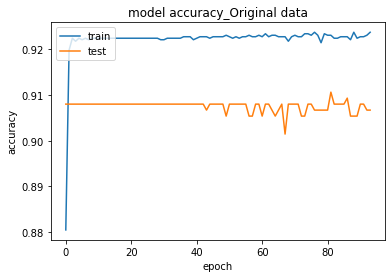

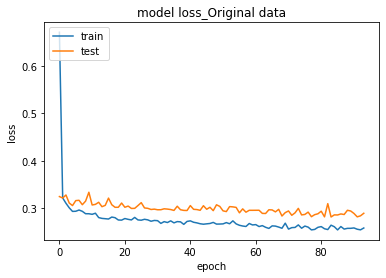

In [47]:
def history_loss_acc(history,name):
    # list all data in history
    print(history.history.keys())
    
    # summarize history for accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy_'+name)
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss_'+name)
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

history_loss_acc(history, 'Original data')

## Inference

In [48]:
# 위의 학습데이터를 전처리한 과정과 동일하게 test data에도 적용
test_x = pd.read_csv('./test_melspectrogram_3features.csv')
test_x = test_x.drop(columns=['id'])
# Data Leakage에 유의하여 train data로만 학습된 ohe를 사용
test_x = onehot_encoding(ohe, test_x)

# Model 추론
preds = model.predict(test_x)
preds

array([[0.90789163, 0.09210833],
       [0.89945346, 0.10054656],
       [0.9554628 , 0.04453719],
       ...,
       [0.91301674, 0.08698323],
       [0.91328007, 0.08671993],
       [0.7558162 , 0.2441838 ]], dtype=float32)

In [50]:
pred_w = pd.DataFrame(np.where((model.predict(test_x)>0.85),0,1))
pred_w = pd.DataFrame(pred_w.iloc[:,0])

## Submission

In [51]:
submission = pd.read_csv('./data/sample_submission.csv')
submission['covid19'] = pred_w
submission.to_csv('./submit.csv', index=False)

In [52]:
data_test = pd.read_csv('./submit.csv')
data_test

,id,covid19
0,3806,0
1,3807,0
2,3808,0
3,3809,0
4,3810,0
...,...,...
5727,9533,0
5728,9534,0
5729,9535,0
5730,9536,0
